In [1]:
import pandas as pd
data = pd.read_csv('data.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600
0,-0.352524,-0.352510,-0.352483,-0.352451,-0.352422,-0.352385,-0.352333,-0.352279,-0.352222,-0.352010,...,-0.391690,-0.408791,-0.428890,-0.451997,-0.478446,-0.508290,-0.524719,-0.514816,-0.478853,0.0
1,-0.330612,-0.330879,-0.331027,-0.331051,-0.330956,-0.330753,-0.330393,-0.329846,-0.329126,-0.328220,...,-0.506289,-0.520253,-0.536752,-0.556150,-0.578699,-0.604782,-0.634778,-0.645473,-0.619089,0.0
2,-0.409931,-0.409926,-0.409724,-0.409270,-0.408618,-0.407806,-0.406747,-0.405422,-0.403896,-0.402191,...,-0.367555,-0.370210,-0.374209,-0.377883,-0.381220,-0.383910,-0.385052,-0.385325,-0.384762,0.0
3,-0.393995,-0.393541,-0.393027,-0.392359,-0.391510,-0.390442,-0.389095,-0.387565,-0.385903,-0.384033,...,-0.406246,-0.409708,-0.413114,-0.417172,-0.420101,-0.420071,-0.418711,-0.415925,-0.412363,0.0
4,-0.353095,-0.353120,-0.353119,-0.353096,-0.352905,-0.352442,-0.351708,-0.350631,-0.349267,-0.347657,...,-0.379602,-0.382138,-0.383377,-0.385071,-0.387280,-0.388908,-0.389704,-0.389292,-0.387030,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,0.113863,0.114067,0.115102,0.117002,0.118827,0.121730,0.126096,0.130330,0.133711,0.136364,...,-0.243669,-0.248655,-0.251399,-0.250052,-0.248036,-0.248057,-0.247004,-0.244881,-0.243704,0.0
9211,-0.239889,-0.240519,-0.239609,-0.238906,-0.238384,-0.237736,-0.237360,-0.236640,-0.235237,-0.233756,...,-0.352633,-0.349895,-0.346640,-0.342515,-0.337792,-0.332335,-0.326710,-0.321426,-0.316228,0.0
9212,-0.242022,-0.240294,-0.238558,-0.236916,-0.235440,-0.234298,-0.233224,-0.232066,-0.231049,-0.230180,...,-0.272139,-0.269776,-0.266998,-0.264084,-0.260706,-0.257360,-0.254332,-0.250838,-0.246529,0.0
9213,-0.204272,-0.203779,-0.203448,-0.203280,-0.203270,-0.203441,-0.203770,-0.204245,-0.204585,-0.204561,...,-0.420632,-0.419569,-0.418219,-0.416472,-0.414174,-0.411820,-0.409738,-0.407747,-0.405995,0.0


In [2]:
X = data.iloc[:,0:3600]
Y = data.iloc[:,3600]

In [3]:
from collections import Counter
c = Counter(Y)
for cnt in c:
    print(c[cnt])

# Normal 7196, other 2019

7196
184
679
658
498


In [4]:
for i in range(len(Y)):
    if Y[i] != 0.0:
        Y[i] = 1.0;

In [5]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0, shuffle=True)

In [6]:
import numpy as np
xTrain = np.array(xTrain)
xTrain = xTrain.reshape(-1, 3600, 1, 1)
print(xTrain.shape)
xTest = np.array(xTest)
xTest = xTest.reshape(-1, 3600, 1, 1)
print(xTest.shape)

(7372, 3600, 1, 1)
(1843, 3600, 1, 1)


In [7]:
yTrain = np.array(yTrain)
yTrain = yTrain.reshape(-1, 1)
print(yTrain.shape)
yTest = np.array(yTest)
yTest = yTest.reshape(-1, 1)
print(yTest.shape)

(7372, 1)
(1843, 1)


In [8]:
import numpy as np
import scipy.io as sio
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
import os

def ECGnet():
    def block3(x, K, filter_shape):
        y = BatchNormalization()(x)
        y = Activation("relu")(y)
        y = Conv1D(K, 1, strides=2, padding="same")(y)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
        x = Conv1D(K, filter_shape, strides=2, padding="same")(x)
        for i in range(2):
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
            x = Conv1D(K, filter_shape, strides=1, padding="same")(x)
        z = GlobalMaxPooling1D()(x)
        z = Dense(4, activation="relu")(z)
        z = Dense(32, activation="sigmoid")(z)
        x = Multiply()([x, z])
        y = Add()([x, y])
        for i in range(3):
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
            x = Conv1D(K, filter_shape, strides=1, padding="same")(x)
        z = GlobalMaxPooling1D()(x)
        z = Dense(4, activation="relu")(z)
        z = Dense(32, activation="sigmoid")(z)
        x = Multiply()([x, z])
        return Add()([x, y])
    def block2(x, K, filter_shape):
        y = x
        for i in range(3):
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
            x = Conv2D(K, filter_shape, padding="same")(x)
        a = x
        x = GlobalMaxPooling2D()(x)
        x = Dense(8, activation="relu")(x)
        x = Dense(32, activation="sigmoid")(x)
        x = Multiply()([a,x])
        return Add()([x, y])
    def block1(x, K, filter_shape):
        # SE ResNet
        y = Conv2D(K, (1,1), strides=(2,1))(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
        x = Conv2D(K,filter_shape,strides=(2,1), padding="same")(x)
        a = x
        x = GlobalMaxPooling2D()(x)
        x = Dense(8, activation="relu")(x)
        x = Dense(32, activation="sigmoid")(x)
        x = Multiply()([a, x])
        return Add()([x,y])

    def scale(x, filter_shape1, filter_shape2):
        for i in range(3):
            x = block2(x, 32, filter_shape1)
        x = Reshape([x.shape[1],x.shape[2]*x.shape[3]])(x)
        print(x)
        for i in range(4):
            x = block3(x, 32, filter_shape2)
        x = GlobalAveragePooling1D()(x)
        return x

    input = Input(shape=(3600,1,1))
    x = Conv2D(32, (50,1), strides=(2,1))(input)
    x = block1(x, 32, (15, 1))
    x = block1(x, 32, (15, 1))
    x = block1(x, 32, (15, 1))
    a = scale(x, (3,1), 3)
    b = scale(x, (5,1), 5)
    c = scale(x, (7,1), 7)
    x = Concatenate()([a,b,c])
    x = Dense(2, activation="sigmoid")(x)
    return Model(inputs=input, outputs=x)

model = ECGnet()
# tf.keras.utils.plot_model(model, to_file='ECG Model.png', show_shapes=True, show_layer_names=True) 查看模型
model.summary()

Tensor("reshape/Reshape:0", shape=(None, 222, 32), dtype=float32)
Tensor("reshape_1/Reshape:0", shape=(None, 222, 32), dtype=float32)
Tensor("reshape_2/Reshape:0", shape=(None, 222, 32), dtype=float32)
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3600, 1, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1776, 1, 32)  1632        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1776, 1, 32)  128         conv2d[0][0]                     
___________________________________________________________________________________

In [9]:
model.compile(optimizer=tf.optimizers.SGD(lr = 0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(xTrain, yTrain, epochs=20,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/20
208/208 [==============================] - 169s 812ms/step - loss: 0.4101 - accuracy: 0.8176 - val_loss: 0.3830 - val_accuracy: 0.8469
Epoch 2/20
208/208 [==============================] - 223s 1s/step - loss: 0.1889 - accuracy: 0.9281 - val_loss: 0.1186 - val_accuracy: 0.9472
Epoch 3/20
208/208 [==============================] - 116s 558ms/step - loss: 0.0947 - accuracy: 0.9694 - val_loss: 0.0889 - val_accuracy: 0.9648
Epoch 4/20
208/208 [==============================] - 202s 969ms/step - loss: 0.0677 - accuracy: 0.9798 - val_loss: 0.2670 - val_accuracy: 0.9119
Epoch 5/20
208/208 [==============================] - 205s 987ms/step - loss: 0.0430 - accuracy: 0.9884 - val_loss: 0.0343 - val_accuracy: 0.9919
Epoch 6/20
208/208 [==============================] - 113s 543ms/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0524 - val_accuracy: 0.9864
Epoch 7/20
208/208 [==============================] - 192s 924ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.1110 - va

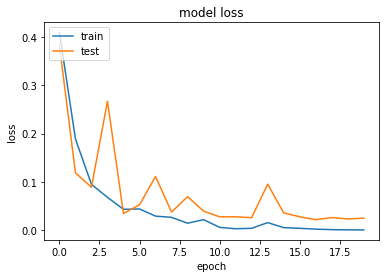

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

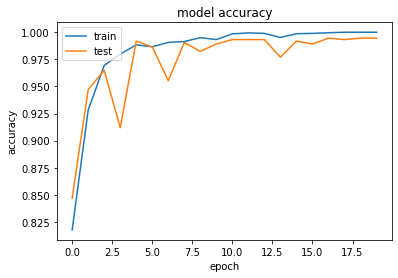

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
scores = model.evaluate(xTest, yTest)
scores[1]

58/58 [==============================] - 4s 70ms/step - loss: 0.0444 - accuracy: 0.9929


0.9929462671279907